In [3]:
# Ejecutar para que funcione el parse_latex en google colab

#!pip install sympy==1.5 antlr4-python3-runtime==4.7.1

# !pip install antlr4-python3-runtime==4.7.1

     |████████████████████████████████| 112kB 5.5MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.1-cp37-none-any.whl size=140552 sha256=0aa9757351b710995dab5b317a03870bcc4c1fefd3fe705dd1f41e0d3acee2cd
  Stored in directory: /root/.cache/pip/wheels/ef/f6/18/ad300e691236a3408a99edc750484b56e8d6b11b2c38eacb10
Successfully built antlr4-python3-runtime


In [1]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display


init_session()

IPython console for SymPy 1.6.2 (Python 3.6.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [2]:

from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities, reduce_abs_inequality

from sympy.calculus.util import continuous_domain, function_range


import matplotlib.pyplot as plt

# %matplotlib inline

In [3]:
# Para que salga bien hay que dejar el matplolib offline

def dominio_trozos(f) :
    set = S.EmptySet
    for t in f.args :
        set = Union(set,continuous_domain(f,x,t[1].as_set()))
    return set



def grafica_funcion_trozos(f, sz=20):
    
    cerrados, abiertos, cerrados_imagen, abiertos_imagen = [],[],[],[]
#     sz=20
    conj_ant=EmptySet
    p=plot(x,(x,0,0),show=False)
    for t in f.args:
#         display(t.args)
#         display(t.args[1].as_set().args)
        actual=S.Reals if t.args[1]==True else t.args[1].as_set()
        conj=Complement(actual,conj_ant)
#         display(conj)
#         display(conj.args)
        ini = conj.args[0] if conj.args[0] != -oo else -sz
        fin = conj.args[1] if conj.args[1] != +oo else sz
#         display(ini,fin)
        p.extend(plot(t.args[0],(x,ini,fin),show=False))
        for j in range(2):  
            if abs(conj.args[j]) != oo :
                if conj.args[j+2] :
                    abiertos.append(conj.args[j])
                    abiertos_imagen.append(t.args[0].subs(x,conj.args[j]))
#                     display(conj.args[j])
                else :
                    cerrados.append(conj.args[j])
                    cerrados_imagen.append(t.args[0].subs(x,conj.args[j]))
#                     display(conj.args[j])       
        conj_ant=t.args[1].as_set()

    abiertos, abiertos_imagen, cerrados, cerrados_imagen
    p.show()
    fg = p._backend.fig 
    ax = p._backend.ax   
    ax[0].set_xlim(-sz,sz)
    ax[0].set_ylim(-sz,sz)
    ax[0].set_aspect('equal')
    plt.scatter([abiertos],[abiertos_imagen],edgecolors='blue',facecolors='white')
    plt.scatter([cerrados],[cerrados_imagen],edgecolors='blue',facecolors='blue')
    plt.grid(True)
    
    return f, fg

In [4]:
def latex_exam(question, parts):
    tex=r"\question "+question+r"\begin{parts} "
    for p in parts :
        tex+=r"\part[1] "+p[0]+r"\begin{solution} "+p[1]+r"\end{solution} " 
    tex+=r"\end{parts} "
    
    return tex

def mostrar_ejercicio(ejercicio,solucion,tipo=0) :
    #tipo=0 se pasa el ejercicio y la solucion en formato latex
    if tipo == 0 :
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion
    elif tipo == 1:
        # falta desarrollar ...
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion

        

In [8]:
# Calcular el dominio de las siguientes funciones:

# Ojo que las raíces cuartas no las hace bien

texto_ejercicio = 'Calcular el dominio de las siguientes funciones:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [r'\frac{x+13}{x^4+x^3-3x^2-3x}', 
                       r'x^6+x^2-2',r'\frac{7x+9}{x^3+8}',
                       r'\sqrt{\frac{x-1}{x}}', r'\sqrt[3]{\frac{x-1}{x}}', r'\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}',
                       r'\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}',r'\frac{1}{4x^2-1}',r'\frac{1}{\sqrt[4]{9-x^2}}',
                       r'\frac{2x+7}{\sqrt[3]{9-x}}',r'\frac{x^2-5x+6}{\sqrt{x^4-1}}',r'\sqrt{-2x^2+5x-3}',
                       r'\frac{x^2-3}{x^3-2x^2-x+2}',r'\frac{5x^3-8}{1+x+x^2}',r'\frac{x-1}{x^4-7x^2-144}',
                       r'\frac{7x+9}{81x^4-16}',
                       r'\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}',
                       r'\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}',
#                        Autoevaluacion
                        r'\frac{1}{x^2+2x+1}',r'\sqrt{x^2+2x-2}',
                       r'\sqrt{\frac{x^2+x}{x-2}}', r'\frac{x^4+2x+5}{x^4-9x^2+4x+12}',
#                        Examen
                       r'\frac{2x+1}{x^{2} - 4 x + 3}',r'\sqrt{x^2+3x+2}',
                       r'\frac{2x-1}{x^{2} + 4 x + 3}',r'\sqrt{x^{2} - 3 x + 2}',
                       r'\frac{1}{2-\sqrt{x}}',
                       # Examen alumno
                       r'\sqrt{\frac{x^2-9}{1-x}}',r'x^4-13x^2+36'
                       ]

question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun, sol =r"$f(x)="+latex(parse_latex(i))+r"$",r"$"+latex(continuous_domain(parse_latex(i),x,S.Reals))+r"$"
    enun, sol =r"$f(x)="+i+r"$",r"$"+latex(continuous_domain(parse_latex(i),x,S.Reals))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])
#     plot_implicit(Eq(y,parse_latex(i)))               


print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcular el dominio de las siguientes funciones:**

#### Ejercicio:

$f(x)=\frac{x+13}{x^4+x^3-3x^2-3x}$ $\to$ $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$

enunciado_latex: $f(x)=\frac{x+13}{x^4+x^3-3x^2-3x}$
solucion_latex: $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$


#### Ejercicio:

$f(x)=x^6+x^2-2$ $\to$ $\mathbb{R}$

enunciado_latex: $f(x)=x^6+x^2-2$
solucion_latex: $\mathbb{R}$


#### Ejercicio:

$f(x)=\frac{7x+9}{x^3+8}$ $\to$ $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$

enunciado_latex: $f(x)=\frac{7x+9}{x^3+8}$
solucion_latex: $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{\frac{x-1}{x}}$ $\to$ $\left(-\infty, 0\right) \cup \left[1, \infty\right)$

enunciado_latex: $f(x)=\sqrt{\frac{x-1}{x}}$
solucion_latex: $\left(-\infty, 0\right) \cup \left[1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[3]{\frac{x-1}{x}}$ $\to$ $\left(-\infty, 0\right) \cup \left(0, \infty\right)$

enunciado_latex: $f(x)=\sqrt[3]{\frac{x-1}{x}}$
solucion_latex: $\left(-\infty, 0\right) \cup \left(0, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$

enunciado_latex: $f(x)=\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{4x^2-1}$ $\to$ $\left(-\infty, - \frac{1}{2}\right) \cup \left(- \frac{1}{2}, \frac{1}{2}\right) \cup \left(\frac{1}{2}, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{4x^2-1}$
solucion_latex: $\left(-\infty, - \frac{1}{2}\right) \cup \left(- \frac{1}{2}, \frac{1}{2}\right) \cup \left(\frac{1}{2}, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{\sqrt[4]{9-x^2}}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{\sqrt[4]{9-x^2}}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x+7}{\sqrt[3]{9-x}}$ $\to$ $\left(-\infty, 9\right) \cup \left(9, \infty\right)$

enunciado_latex: $f(x)=\frac{2x+7}{\sqrt[3]{9-x}}$
solucion_latex: $\left(-\infty, 9\right) \cup \left(9, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^2-5x+6}{\sqrt{x^4-1}}$ $\to$ $\left(-\infty, -1\right) \cup \left(1, \infty\right)$

enunciado_latex: $f(x)=\frac{x^2-5x+6}{\sqrt{x^4-1}}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{-2x^2+5x-3}$ $\to$ $\left[1, \frac{3}{2}\right]$

enunciado_latex: $f(x)=\sqrt{-2x^2+5x-3}$
solucion_latex: $\left[1, \frac{3}{2}\right]$


#### Ejercicio:

$f(x)=\frac{x^2-3}{x^3-2x^2-x+2}$ $\to$ $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\frac{x^2-3}{x^3-2x^2-x+2}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{5x^3-8}{1+x+x^2}$ $\to$ $\mathbb{R}$

enunciado_latex: $f(x)=\frac{5x^3-8}{1+x+x^2}$
solucion_latex: $\mathbb{R}$


#### Ejercicio:

$f(x)=\frac{x-1}{x^4-7x^2-144}$ $\to$ $\left(-\infty, -4\right) \cup \left(-4, 4\right) \cup \left(4, \infty\right)$

enunciado_latex: $f(x)=\frac{x-1}{x^4-7x^2-144}$
solucion_latex: $\left(-\infty, -4\right) \cup \left(-4, 4\right) \cup \left(4, \infty\right)$


#### Ejercicio:

$f(x)=\frac{7x+9}{81x^4-16}$ $\to$ $\left(-\infty, - \frac{2}{3}\right) \cup \left(- \frac{2}{3}, \frac{2}{3}\right) \cup \left(\frac{2}{3}, \infty\right)$

enunciado_latex: $f(x)=\frac{7x+9}{81x^4-16}$
solucion_latex: $\left(-\infty, - \frac{2}{3}\right) \cup \left(- \frac{2}{3}, \frac{2}{3}\right) \cup \left(\frac{2}{3}, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}$ $\to$ $\left(-\infty, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}$
solucion_latex: $\left(-\infty, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}$ $\to$ $\left(-\infty, -1\right) \cup \left[5, \infty\right)$

enunciado_latex: $f(x)=\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}$
solucion_latex: $\left(-\infty, -1\right) \cup \left[5, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{x^2+2x+1}$ $\to$ $\left(-\infty, -1\right) \cup \left(-1, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{x^2+2x+1}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(-1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^2+2x-2}$ $\to$ $\left(-\infty, - \sqrt{3} - 1\right] \cup \left[-1 + \sqrt{3}, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^2+2x-2}$
solucion_latex: $\left(-\infty, - \sqrt{3} - 1\right] \cup \left[-1 + \sqrt{3}, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{\frac{x^2+x}{x-2}}$ $\to$ $\left[-1, 0\right] \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\sqrt{\frac{x^2+x}{x-2}}$
solucion_latex: $\left[-1, 0\right] \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^4+2x+5}{x^4-9x^2+4x+12}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\frac{x^4+2x+5}{x^4-9x^2+4x+12}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x+1}{x^{2} - 4 x + 3}$ $\to$ $\left(-\infty, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{2x+1}{x^{2} - 4 x + 3}$
solucion_latex: $\left(-\infty, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^2+3x+2}$ $\to$ $\left(-\infty, -2\right] \cup \left[-1, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^2+3x+2}$
solucion_latex: $\left(-\infty, -2\right] \cup \left[-1, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x-1}{x^{2} + 4 x + 3}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, \infty\right)$

enunciado_latex: $f(x)=\frac{2x-1}{x^{2} + 4 x + 3}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^{2} - 3 x + 2}$ $\to$ $\left(-\infty, 1\right] \cup \left[2, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^{2} - 3 x + 2}$
solucion_latex: $\left(-\infty, 1\right] \cup \left[2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{2-\sqrt{x}}$ $\to$ $\left[0, 4\right) \cup \left(4, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{2-\sqrt{x}}$
solucion_latex: $\left[0, 4\right) \cup \left(4, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{\frac{x^2-9}{1-x}}$ $\to$ $\left(-\infty, -3\right] \cup \left(1, 3\right]$

enunciado_latex: $f(x)=\sqrt{\frac{x^2-9}{1-x}}$
solucion_latex: $\left(-\infty, -3\right] \cup \left(1, 3\right]$


#### Ejercicio:

$f(x)=x^4-13x^2+36$ $\to$ $\mathbb{R}$

enunciado_latex: $f(x)=x^4-13x^2+36$
solucion_latex: $\mathbb{R}$
\question Calcular el dominio de las siguientes funciones:\begin{parts} \part[1] $f(x)=\dfrac{x+13}{x^4+x^3-3x^2-3x}$\begin{solution} $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$\end{solution} \part[1] $f(x)=x^6+x^2-2$\begin{solution} $\mathbb{R}$\end{solution} \part[1] $f(x)=\dfrac{7x+9}{x^3+8}$\begin{solution} $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt{\dfrac{x-1}{x}}$\begin{solution} $\left(-\infty, 0\right) \cup \left[1, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt[3]{\dfrac{x-1}{x}}$\begin{solution} $\left(-\infty, 0\right) \cup \left(0, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt[4]{\dfrac{x(x+7)}{x^2+5x+6}}$\begin{solution} $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$\end{solution} \part[1] $f(x)=\dfrac{x^3-6x^

In [5]:
expand((x-4)*(x-9))

In [ ]:
# Esto lo hace mal, se olvida de la raíz cuarta

print(parse_latex(r'\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}'))
expr=(x*(x + 7)/(x**2 + 5*x + 6))**(1/4)
expr2=(x*(x + 7)/(x**2 + 5*x + 6))
continuous_domain(expr,x,S.Reals), continuous_domain(expr,x,S.Reals), continuous_domain(root(x,4),x,S.Reals)
singularities(sqrt(1/x),x)


(x(x + 7)/(x**2 + 5*x + 6))**(1/4)


In [15]:
texto_ejercicio = 'Representa las siguientes funciones a trozos e indica sus propiedades:'
display(md("**"+texto_ejercicio+"**"))

enunciado = [
#              Piecewise((4,x<-2),(-x**2,x<4),(2*x-3,x>=4)),
#              Piecewise((2*x,x<-3),(x**2-2*x-8,x<=3),(2*x-3,x>3)),
#              Piecewise((x+1,x<=0),(x**2-4*x+3,x>0)),
# #            Autoevaluacion  
#              Piecewise((-2,x<-2),(-x**2,x<3),(2*x-3,x>=3)),
#              Piecewise((-3*x,x<-2),(x**2-2*x-8,x<=4),(2*x-1,x>4)),
#              Piecewise((x+1,x<=-1),(x**2-4*x+3,x>-1)),
#         Examen
             Piecewise((2*x+2,x<=-1),(x**2 - 2* x,x>-1)),
             Piecewise((-2*x+3,x<1),(x**2-6*x+8,x>=1)),
             Piecewise((2*x-3,x<=-1),(-x**2 + 2* x,x>-1)),
             Piecewise((-2*x+3,x<1),(-x**2+6*x-8,x>=1)),
             Piecewise((2*x+3,x<-2),(3,x<=2),(-x+3,x>2)),
             Piecewise((-2*x+3,x<-1),(3,x<=3),(x+3,x>3)),
    
#     Examen extra
                Piecewise((2*x-4,x<-2),(-x**2+4*x-3,x<3),(3,x>3)),
                       ]
question=texto_ejercicio
parts=[]
sz=20

for n,i in enumerate(enunciado) :
#     enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\input{funcion_a_trozos_"""+latex(n)+r""".pgf}}"""
#     enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\includegraphics[width=1\columnwidth]{funcion_a_trozos_"""+latex(n)+r"""}}"""
    enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_"""+latex(n)+r"""}}"""

    fg = grafica_funcion_trozos(i)[1]
#    fg.savefig("funcion_a_trozos_{}.pgf".format(n))
#     fg.savefig("funcion_a_trozos_{}.png".format(n))
    fg.savefig("ex_funcion_a_trozos_{}.png".format(n))

    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])          

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Representa las siguientes funciones a trozos e indica sus propiedades:**

#### Ejercicio:

$f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}

enunciado_latex: $f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}


#### Ejercicio:

$f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}

enunciado_latex: $f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\- x^{2} + 6 x - 8 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_3}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\- x^{2} + 6 x - 8 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_3}}


#### Ejercicio:

$f(x)=\begin{cases} 2 x + 3 & \text{for}\: x < -2 \\3 & \text{for}\: x \leq 2 \\3 - x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_4}}

enunciado_latex: $f(x)=\begin{cases} 2 x + 3 & \text{for}\: x < -2 \\3 & \text{for}\: x \leq 2 \\3 - x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_4}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < -1 \\3 & \text{for}\: x \leq 3 \\x + 3 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_5}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < -1 \\3 & \text{for}\: x \leq 3 \\x + 3 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_5}}


#### Ejercicio:

$f(x)=\begin{cases} 2 x - 4 & \text{for}\: x < -2 \\- x^{2} + 4 x - 3 & \text{for}\: x < 3 \\3 & \text{for}\: x > 3 \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_6}}

enunciado_latex: $f(x)=\begin{cases} 2 x - 4 & \text{for}\: x < -2 \\- x^{2} + 4 x - 3 & \text{for}\: x < 3 \\3 & \text{for}\: x > 3 \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_6}}
\question Representa las siguientes funciones a trozos e indica sus propiedades:\begin{parts} \part[1] $f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}\end{solution} \part[1] $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}\end{solution} \part[1] $f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}\end{solution} \part[1] $f(x)=\begin{ca

In [13]:
expand((x-1)*(3-x))

In [27]:
expand(x*(x-2)), expand((x-1)**2-2*(x-1))
solve(x**2-6*x+8)

**Representa las siguientes funciones e indica sus propiedades**

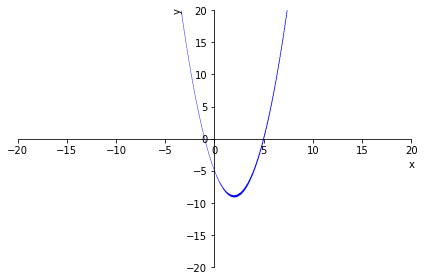

#### Ejercicio:

$f(x)=x^2-4x-5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}

enunciado_latex: $f(x)=x^2-4x-5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}


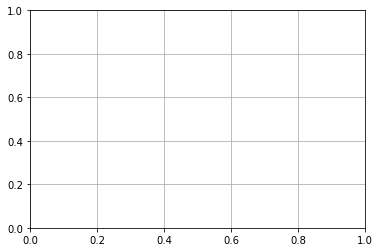

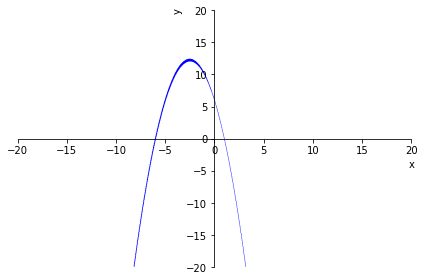

#### Ejercicio:

$f(x)=-x^2-5x+6$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}

enunciado_latex: $f(x)=-x^2-5x+6$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}


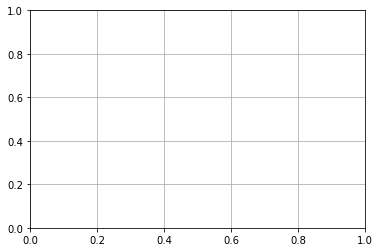

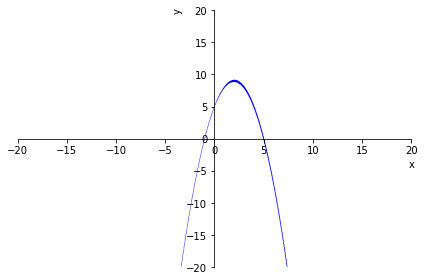

#### Ejercicio:

$f(x)=-x^2+4x+5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}

enunciado_latex: $f(x)=-x^2+4x+5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}


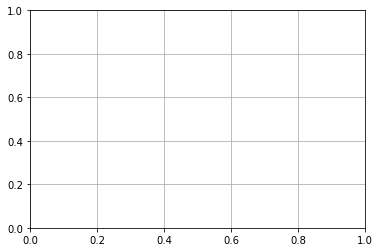

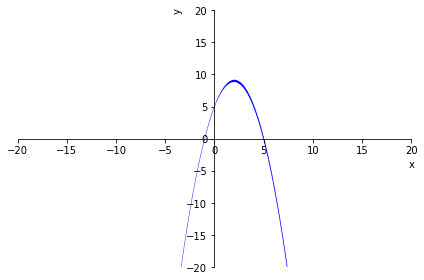

#### Ejercicio:

$f(x)=-x^2+4x+5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}

enunciado_latex: $f(x)=-x^2+4x+5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}


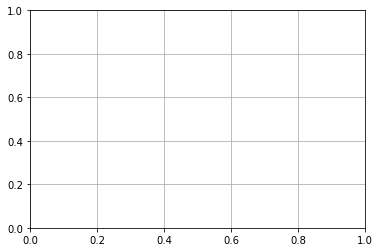

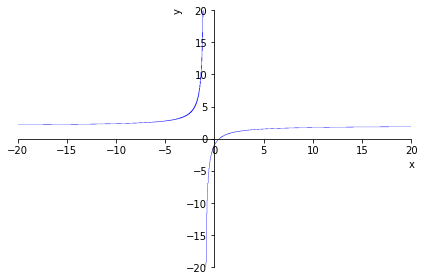

#### Ejercicio:

$f(x)=\frac{2x-1}{x+1}$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}

enunciado_latex: $f(x)=\frac{2x-1}{x+1}$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}


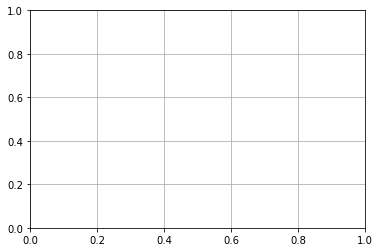

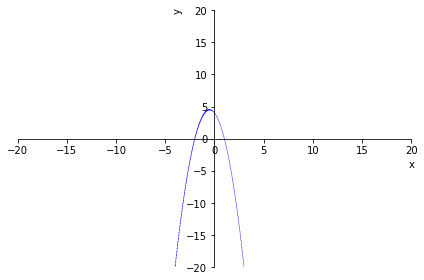

#### Ejercicio:

$f(x)=- 2 x^{2} - 2 x + 4$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}

enunciado_latex: $f(x)=- 2 x^{2} - 2 x + 4$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}


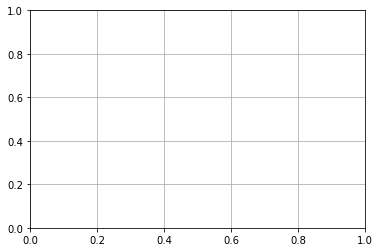

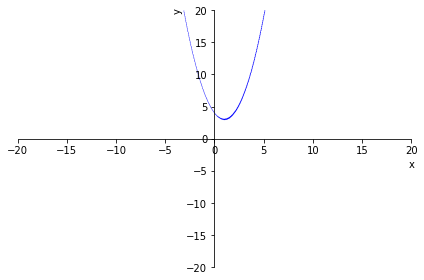

#### Ejercicio:

$f(x)=x^2-2x+4$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_6.png}}

enunciado_latex: $f(x)=x^2-2x+4$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_6.png}}
\question Representa las siguientes funciones e indica sus propiedades\begin{parts} \part[1] $f(x)=x^2-4x-5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}\end{solution} \part[1] $f(x)=-x^2-5x+6$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}\end{solution} \part[1] $f(x)=-x^2+4x+5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}\end{solution} \part[1] $f(x)=-x^2+4x+5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}\end{solution} \part[1] $f(x)=\dfrac{2x-1}{x+1}$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}\end{solution} \part[1] $f(x)=- 2 x^{2} - 2 x + 4$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}\end{solution} \part[1] $f(x)=x^2-2x+4$\begin{

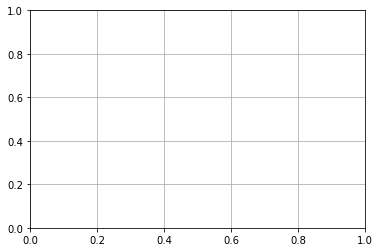

In [ ]:
texto_ejercicio = 'Representa las siguientes funciones e indica sus propiedades'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [r'x^2-4x-5', r'-x^2-5x+6',r'-x^2+4x+5',
#                        autoevaluación
                       r'-x^2+4x+5', r'\frac{2x-1}{x+1}',r'- 2 x^{2} - 2 x + 4',r'x^2-2x+4'

                       
                       ]
question=texto_ejercicio
parts=[]
sz=20

for n,i in enumerate(pre_enunciado_latex) :
#     enun, sol =r"$f(x)="+i+r"$",r"""\scalebox{.6}{\input{funcion_"""+latex(n)+r""".pgf}}"""
    enun, sol =r"$f(x)="+i+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_"""+latex(n)+r""".png}}"""
    p= plot_implicit(Eq(y,parse_latex(i)),(x,-sz,sz),(y,-sz,sz))
    fg = p._backend.fig 
    ax = p._backend.ax
    ax[0].set_xlim(-sz,sz)
    ax[0].set_ylim(-sz,sz)
    ax[0].set_aspect('equal')
    plt.grid(True)
#     fg.savefig("funcion_{}.pgf".format(n))
    fg.savefig("funcion_{}.png".format(n))
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])          

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))